In [1]:
import tqdm as tqdm
import nibabel as nib
import glob
import os
import numpy as np
from src.dataloader import get_mri_dataloader

/cluster/home/herminea/.conda/envs/tdt4265_medseg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
data_dir = "/cluster/projects/vc/data/mic/open/HNTS-MRG"
data_dir_train = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train"

# Print folders and files within the data directory
print(f"Data directory: {os.listdir(data_dir)}")

train_dataset = get_mri_dataloader(data_dir, subset = "train", batch_size=1, validation_fraction=0.1)
test_dataset = get_mri_dataloader(data_dir, subset = "test", batch_size=1, validation_fraction=0.1)

print(f"Total images in 'train' dataset: {len(train_dataset)}")
print(f"Total images in 'test' dataset: {len(test_dataset)}")



In [2]:
import matplotlib.pyplot as plt
import torch

def show_multiple_slices(image, label, slice_indices=None, title_prefix=""):
    """
    Visualizes several slices of a 3D MRI image and its corresponding label mask.
    
    Args:
        image (Tensor or np.ndarray): Image in shape [C, H, W, D].
        label (Tensor or np.ndarray): Label in shape [C, H, W, D].
        slice_indices (list or int, optional): List of slice indices to display.
            If an integer is provided, that single slice is used.
            If None, a set of evenly spaced slices are chosen.
        title_prefix (str): Prefix to add to the titles.
    """
    # Convert to numpy arrays if tensors.
    if torch.is_tensor(image):
        image = image.detach().cpu().numpy()
    if torch.is_tensor(label):
        label = label.detach().cpu().numpy()
        
    # Remove channel dimension if it exists.
    if image.shape[0] == 1:
        image = image[0]
    if label.shape[0] == 1:
        label = label[0]
        
    # Determine slice indices.
    total_slices = image.shape[-1]
    if slice_indices is None:
        # Choose 5 evenly spaced slices as default.
        slice_indices = list(np.linspace(0, total_slices - 1, 5, dtype=int))
    elif isinstance(slice_indices, int):
        slice_indices = [slice_indices]
    
    num_slices = len(slice_indices)
    
    # Create a figure with num_slices rows and 2 columns.
    fig, axs = plt.subplots(num_slices, 2, figsize=(10, 4 * num_slices))
    
    # Ensure axs is 2D array even if num_slices==1.
    if num_slices == 1:
        axs = np.expand_dims(axs, axis=0)
    
    for i, idx in enumerate(slice_indices):
        # Image slice
        axs[i, 0].imshow(image[:, :, idx], cmap="gray")
        axs[i, 0].set_title(f"{title_prefix}Image Slice {idx}")
        axs[i, 0].axis("off")
        
        # Label slice; using a colormap (e.g., viridis) to show classes 0, 1, and 2.
        im = axs[i, 1].imshow(label[:, :, idx], cmap="viridis", vmin=0, vmax=2, interpolation='none')
        axs[i, 1].set_title(f"{title_prefix}Label Slice {idx}")
        axs[i, 1].axis("off")
    
    plt.tight_layout()
    plt.show()




In [3]:
# Example usage with your dataloader
data_dir = "/cluster/projects/vc/data/mic/open/HNTS-MRG"
train_loader, _ = get_mri_dataloader(data_dir, subset="train", batch_size=2, validation_fraction=0.1)

# Loop through a few batches and visualize multiple slices per image.
for i, batch in enumerate(train_loader):
    image = batch["image"][0]  # Expected shape [C, H, W, D]
    label = batch["label"][0]  # Expected shape [C, H, W, D]
    
    print(f"\nBatch {i+1} - Image shape: {image.shape}, Label shape: {label.shape}")
    print(f"Unique label values: {torch.unique(label)}")
    
    # Iterate over multiple slices: here we choose, e.g., slices at 25%, 50%, and 75% of the volume.
    total_slices = image.shape[-1]
    slice_indices = [total_slices // 4, total_slices // 2, (3 * total_slices) // 4]
    
    show_multiple_slices(image, label, slice_indices=slice_indices, title_prefix=f"Sample {i+1}: ")
    
    if i == 2:
        break  # Show for first 3 batches only.

monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
Loading dataset:  26%|██▌       | 34/130 [02:29<07:00,  4.38s/it]


KeyboardInterrupt: 

In [ ]:
train_dir = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/"  # Adjust path if necessary
test_dir = "/cluster/projects/vc/data/mic/open/HNTS-MRG/test/"

# List some files
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

print("Train Samples:", train_files[:5])  # Show first 5 files
print("Test Samples:", test_files[:5])

In [10]:
sample_ids = train_files[:5]  # Select first 5 samples

for sample_id in sample_ids:

    preRT_path = os.path.join(train_dir, sample_id, "preRT")
    midRT_path = os.path.join(train_dir, sample_id, "midRT")

    # List files inside preRT and midRT
    preRT_files = os.listdir(preRT_path) if os.path.exists(preRT_path) else []
    midRT_files = os.listdir(midRT_path) if os.path.exists(midRT_path) else []

    print(f"Files in preRT_path:", preRT_files)
    print(f"Files in midRT_path:", midRT_files, "\n")

Files in preRT_path: ['50_preRT_mask.nii.gz', '50_preRT_T2.nii.gz']
Files in midRT_path: ['50_midRT_mask.nii.gz', '50_midRT_T2.nii.gz', '50_preRT_mask_registered.nii.gz', '50_preRT_T2_registered.nii.gz'] 

Files in preRT_path: ['46_preRT_mask.nii.gz', '46_preRT_T2.nii.gz']
Files in midRT_path: ['46_preRT_T2_registered.nii.gz', '46_preRT_mask_registered.nii.gz', '46_midRT_T2.nii.gz', '46_midRT_mask.nii.gz'] 

Files in preRT_path: ['75_preRT_T2.nii.gz', '75_preRT_mask.nii.gz']
Files in midRT_path: ['75_preRT_T2_registered.nii.gz', '75_midRT_mask.nii.gz', '75_midRT_T2.nii.gz', '75_preRT_mask_registered.nii.gz'] 

Files in preRT_path: ['119_preRT_T2.nii.gz', '119_preRT_mask.nii.gz']
Files in midRT_path: ['119_preRT_mask_registered.nii.gz', '119_midRT_T2.nii.gz', '119_midRT_mask.nii.gz', '119_preRT_T2_registered.nii.gz'] 

Files in preRT_path: ['11_preRT_mask.nii.gz', '11_preRT_T2.nii.gz']
Files in midRT_path: ['11_midRT_T2.nii.gz', '11_preRT_mask_registered.nii.gz', '11_preRT_T2_registered

In [18]:
# Pick a sample file
sample_file = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/75/preRT/75_preRT_T2.nii.gz"
mask_file = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/75/preRT/75_preRT_mask.nii.gz"

# Load the MRI and mask
mri_img = nib.load(sample_file)
mask_img = nib.load(mask_file)

# Extract image data
mri_data = mri_img.get_fdata()
mask_data = mask_img.get_fdata()

# Print details
print("MRI Shape:", mri_data.shape)
print("Mask Shape:", mask_data.shape)
print("Voxel Spacing:", mri_img.header.get_zooms())  # Spacing in mm
print("Intensity Range (MRI):", np.min(mri_data), "-", np.max(mri_data))
print("Unique Values in Mask:", np.unique(mask_data))  # Should be 0 (background) & 1 (tumor)


MRI Shape: (512, 512, 70)
Mask Shape: (512, 512, 70)
Voxel Spacing: (0.5, 0.5, 2.0)
Intensity Range (MRI): 0.0 - 472.0
Unique Values in Mask: [0. 1. 2.]


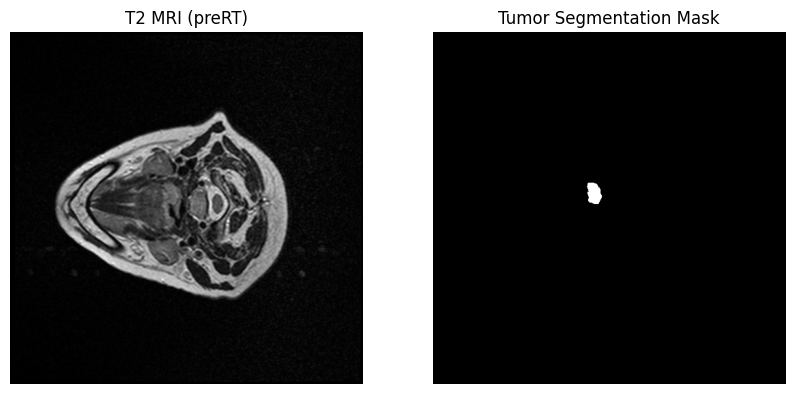

In [12]:
import matplotlib.pyplot as plt

# Pick a middle slice
slice_idx = mri_data.shape[2] // 2

# Display MRI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_data[:, :, slice_idx], cmap="gray")
plt.title("T2 MRI (preRT)")
plt.axis("off")

# Display Mask
plt.subplot(1, 2, 2)
plt.imshow(mask_data[:, :, slice_idx], cmap="gray")
plt.title("Tumor Segmentation Mask")
plt.axis("off")

plt.show()


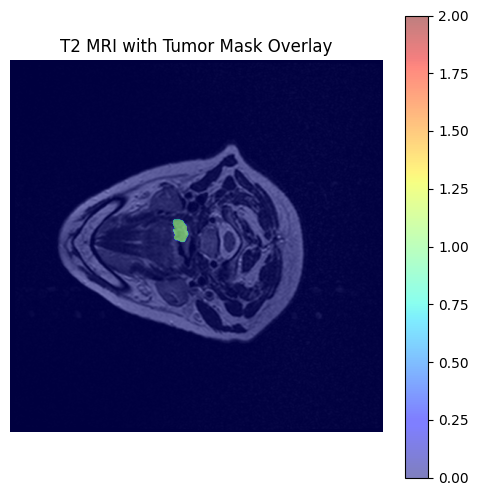

In [14]:
plt.figure(figsize=(6, 6))
plt.imshow(mri_data[:, :, slice_idx], cmap="gray")
plt.imshow(mask_data[:, :, slice_idx], cmap="jet", alpha=0.5, vmin=0, vmax=2)  # Overlay mask
plt.colorbar()
plt.title("T2 MRI with Tumor Mask Overlay")
plt.axis("off")
plt.show()


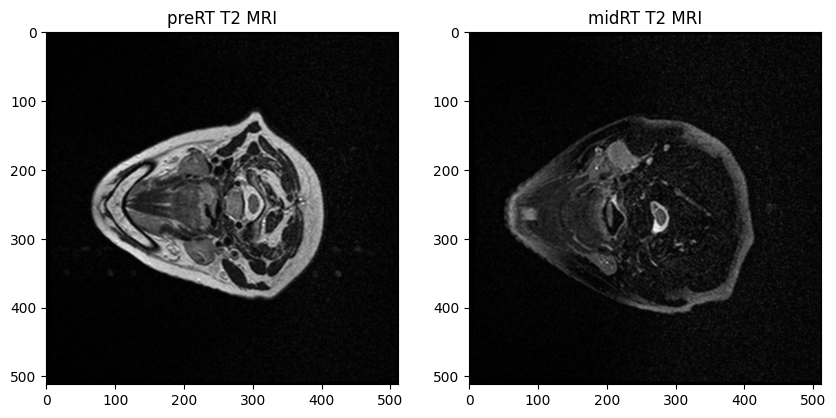

In [15]:
# Load midRT image
midRT_file = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/50/midRT/50_midRT_T2.nii.gz"
midRT_img = nib.load(midRT_file).get_fdata()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_data[:, :, slice_idx], cmap="gray")
plt.title("preRT T2 MRI")

plt.subplot(1, 2, 2)
plt.imshow(midRT_img[:, :, slice_idx], cmap="gray")
plt.title("midRT T2 MRI")

plt.show()


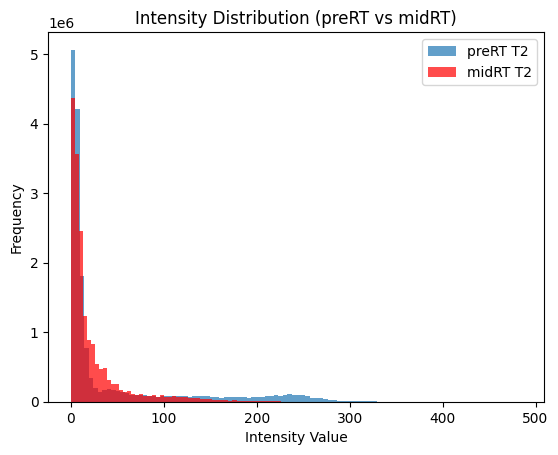

In [16]:
plt.hist(mri_data.flatten(), bins=100, alpha=0.7, label="preRT T2")
plt.hist(midRT_img.flatten(), bins=100, alpha=0.7, label="midRT T2", color="red")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.legend()
plt.title("Intensity Distribution (preRT vs midRT)")
plt.show()



In [19]:
tumor_pixels = np.sum(mask_data > 0)
background_pixels = np.sum(mask_data == 0)

tumor_ratio = tumor_pixels / (tumor_pixels + background_pixels)
print(f"Tumor pixels: {tumor_pixels}, Background pixels: {background_pixels}")
print(f"Percentage of tumor pixels: {tumor_ratio*100:.2f}%")


Tumor pixels: 57218, Background pixels: 18292862
Percentage of tumor pixels: 0.31%
